### Import the features

In [1]:
import pandas as pd
data = pd.read_excel('wavelet_features_digit_0.xlsx') #Read digit 0 data
for i in range (1,10): #Efficiently add the other digits using dynamic variable names. A.I still can't do it
    globals()['data' + str(i)] = pd.read_excel('wavelet_features_digit_'+str(i)+'.xlsx')
    data = pd.concat([data,globals()['data'+str(i)]],axis=0)

data['digit'] = data['digit'].map(int)
data.sample(10) #Check the dataframe 
#(3000 x 7), 3000 digits with a label + 6 features


,digit,Energy,Entropy,Mean,Std,Skewness,Kurtosis
92,7,0.305906,1.512299,-0.000962,0.048499,0.012376,1.483263
143,3,0.991151,3.719032,-0.000124,0.081835,-0.026030,1.503027
115,0,1.634921,5.664854,-0.000138,0.106553,0.167963,0.456993
274,0,0.020159,0.151948,-0.000256,0.013724,0.137798,0.935269
30,0,0.121700,0.600428,0.000514,0.033565,-0.537519,8.093026
87,3,0.978233,4.195004,-0.001170,0.086078,0.039800,-0.475909
145,4,0.801806,3.150813,-0.000021,0.077354,-0.044800,1.050260
175,7,0.337299,1.554910,-0.040900,0.048898,-0.443803,3.131957
65,1,0.805374,3.516533,0.004042,0.082869,-0.096109,-0.752421
273,3,0.010175,0.080007,-0.000022,0.009844,-0.762342,4.308664


### Split the data into 70/30 training/testing, and normalize

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

trainset, testset, train_labels, test_labels = train_test_split(data.iloc[:, 2:], data["digit"], test_size=0.30, random_state=42) #Create the training and testing sets. 70/30 split

print(trainset)
#(2100 x 6), as in 2100 digits each with 6 features. 2100 being 70% of the original 3000 digits
print(testset)
#(900 x 6)

scaler = StandardScaler()
trainset=scaler.fit_transform(trainset)
testset=scaler.fit_transform(testset)


      Entropy      Mean       Std  Skewness  Kurtosis
11   0.516015  0.000059  0.027691 -0.332748  0.169596
230  0.039275 -0.000259  0.007798  0.137274  1.616106
87   7.054559  0.001856  0.112188 -0.083829 -0.427068
49   0.504223  0.000530  0.022047 -0.404145 -0.203891
83   2.515692 -0.000256  0.064445  0.001744  5.684599
..        ...       ...       ...       ...       ...
138  3.800989 -0.000081  0.090070  0.421401  3.713991
195  2.035555 -0.040658  0.048074 -0.059851 -0.343554
230  0.057957 -0.000064  0.008847  0.042185 -0.194112
94   5.566278  0.002896  0.110435 -0.071172  0.492443
260  0.104761 -0.000201  0.013086 -0.153759  0.941609

[2100 rows x 5 columns]
      Entropy      Mean       Std  Skewness   Kurtosis
1    0.120047 -0.000050  0.012295 -0.481878  12.073999
290  0.091472 -0.000029  0.011430  0.064054   0.781487
17   0.182257  0.000451  0.016272 -0.227620   5.695840
251  0.058898  0.000039  0.008798 -0.215762   0.506451
105  4.668341 -0.000005  0.115196 -0.087301   3.1278

### Create MLP and train it

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = MLPClassifier(
                      hidden_layer_sizes=(128,64,32,16), #Architecture is 4 hidden layers as follows: 8 input x 128x64x32x16 hidden layers x 10 outputs
                      activation='relu', #Relu for hidden layers activation function
                      solver='sgd', #Stochastic gradient descent
                      alpha=0.001, #Lambda in class, the strength of L2 regularization
                      learning_rate='adaptive', #Learning rate is divided by 5 if two consecutive epochs fail to decrease training loss by at least the tolerance (defined belowe)
                      learning_rate_init=0.03, #Initial learning rate
                      tol= 0.00001, #Tolerance for adaptive learning condition
                      momentum=0.9, #Momentum for gradient descent
                      random_state=12,  #Seed for reproducability
                      max_iter=10000, #Number of epochs
                      shuffle=True, #Shuffle samples in each new epoch
                      verbose=True,
                      n_iter_no_change=10, #Stop training after this many epochs without improvements of at least tol in the loss
                      ).fit(trainset, train_labels)



Iteration 1, loss = 2.33491317
Iteration 2, loss = 2.29924927
Iteration 3, loss = 2.27068693
Iteration 4, loss = 2.23620931
Iteration 5, loss = 2.19692881
Iteration 6, loss = 2.15176266
Iteration 7, loss = 2.11387763
Iteration 8, loss = 2.08334742
Iteration 9, loss = 2.06057638
Iteration 10, loss = 2.03772627
Iteration 11, loss = 2.01675320
Iteration 12, loss = 2.00024168
Iteration 13, loss = 1.98581131
Iteration 14, loss = 1.97161463
Iteration 15, loss = 1.95589880
Iteration 16, loss = 1.94883448
Iteration 17, loss = 1.94267702
Iteration 18, loss = 1.92822202
Iteration 19, loss = 1.92107720
Iteration 20, loss = 1.91595431
Iteration 21, loss = 1.91098185
Iteration 22, loss = 1.90285185
Iteration 23, loss = 1.89022070
Iteration 24, loss = 1.87956617
Iteration 25, loss = 1.88105532
Iteration 26, loss = 1.86802248
Iteration 27, loss = 1.86334065
Iteration 28, loss = 1.86085115
Iteration 29, loss = 1.84056217
Iteration 30, loss = 1.84017002
Iteration 31, loss = 1.83747839
Iteration 32, los

### Test the MLP

Accuracy is  0.3566666666666667
Precision is  0.3672
Recall is  0.3656
F1 score is  0.353


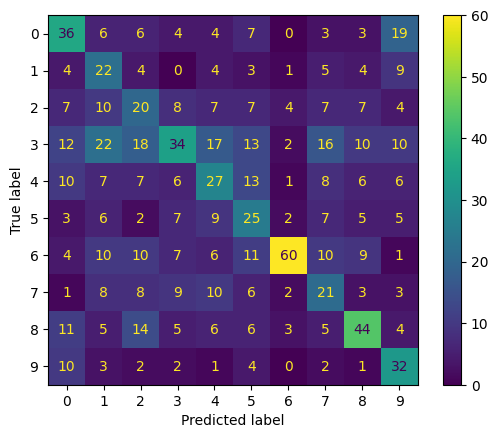

In [4]:
import torch as torch
from torcheval.metrics.functional import multiclass_f1_score, multiclass_recall, multiclass_precision
true_labels_tensor = torch.tensor(test_labels.values)
pred_labels_tensor = torch.tensor(model.predict(testset))
acc = model.score(testset,test_labels)
prec = round(multiclass_precision(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
recall = round(multiclass_recall(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
f1 = round(multiclass_f1_score(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
print("Accuracy is ", acc)
print("Precision is ", prec)
print("Recall is ", recall)
print("F1 score is ", f1)
cm = confusion_matrix(model.predict(testset), test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()